本文介绍 matplotlib 相关的内容，以例子为主。

<!-- more -->

全文的初始化加载如下：

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from numpy.random import rand

## 绘制与保存

### 基础绘图：plt.plot

基础的绘图使用 plt.plot() 命令，并用 plt.show() 显示。

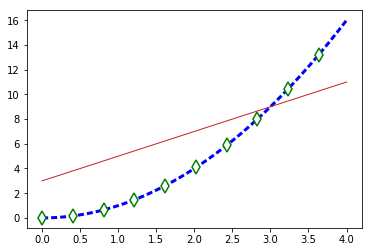

In [2]:
# 向量常常使用 linspace 或者 arange 命令进行初始化。下两例等价：
# np.linspace(0, 4, 4)：闭区间 [0,4] 上等距取 4 个点
# np.arange(0, 5, 1)：左闭右开区间 [0, 5) 上以步长 1 取点
x = np.linspace(0, 4, 100)
y1 = x ** 2
y2 = 2 * x + 3

plt.plot(x, y1, color="b", linestyle=":", linewidth=3, dashes=(2,1),  # 线的属性
         marker="d", ms=10, mew=1.5, mec="g", mfc="w",  # 点的属性
         markevery=10)
plt.plot(x, y2, "#bf242a", ls="-", lw=1)
plt.show()

一些常用的性质：
- **color**：线的颜色。红r，绿g，蓝b，青c，洋红m，黄y，黑k，白w。
  - 一些其他的颜色表述：color="#66ccff" HTML码；(1, 0, 0) 标准化的RGB元组；"0.5" 灰度字串。
- **linestyle(ls)**：线型。实线"-"，虚线"--"，点划线"-."，点线":"。
  - dashes: 虚线比例。传入元组 (a,b)，那么划线长与间隔长之比为 a/b。
- **linewidth(lw)**：线宽。
- **marker**：点样式。实心"."，像素","，圆点"o"，方块"s"，上折/下折箭头"v"/"\^"，左折/右折箭头"<"/">"，五边形"p"，六边形"h"，星"\*"，加号"+"，叉号"x"，(瘦)钻石"d/D"，竖线"'&#124;"，横线"\_"。
  - markevery：每几个点才绘制一个点。
  - markersize(ms)：点大小。
  - markeredgewidth(mew)：点边缘线宽。
  - markeredgecolor(mec)：点边缘颜色。默认与线同色。
  - markerfacecolor(mfc)：点填充颜色。默认与线同色。

另外介绍 plt.close() 命令。通常用 `plt.close("all")` 来关闭所有的图片。

### 多图绘制：plt.subplots

上面的内容我称之为基础绘制，是一种多语句排列、最后用 plt.show() 命令转换为图像输出的方式。而下文要介绍的命令，大多是基于多图绘制的，会**事先声明总图(figure对象)与所有子图句柄(Axes对象)**。

例如 plt.title() 命令是基础绘制中的命令，直接调用自 matplotlib.pyplot 里的命令。而在多图绘制下，则是先生成一种子图的实例 ax，再从实例中调用一个等价的函数 ax.set_title() 。

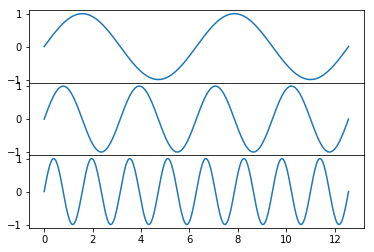

In [3]:
# 该例子改编自：http://matplotlib.org/examples/pylab_examples/subplots_demo.html
x = np.linspace(0, 4 * np.pi, 400)
y1 = np.sin(x)
y2 = np.sin(2 * x)
y3 = np.sin(4 * x)
y = [y1, y2, y3]

plt.close("all")
# f, (ax1, ax2, ax3) = ... 也是一种写法
f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.subplots_adjust(hspace=0)  # 调整函数
for i in range(len(y)):
    axarr[i].plot(x, y[i])

plt.show()

`plt.subplots()` 是一个实用的命令：
- nrows, ncols：子图的行数与列数。默认为 1. 上例的 subplots(3) 相当于 subplots(3, 1)。
- sharex, sharey：轴对齐True，不对齐False，每行对齐"row"，每列对齐"col"。

有些参数可以直接在 subplots 中使用，但其实会进一步传递给其他函数。一并在这里介绍：
- figsize：元组，图片长与宽。
- gridspec_kw：字典。给出图片的宽/长之比，例如“条形图”一节：gridspec_kw={'height_ratios':[1, 2]}。

调整函数 `subplots_adjust` 是一个视觉命令：
- left, right, bottom, top：间距。
- hspace，wspace：纵向/横向间距。

### 图像保存

多图绘制一个便利之处在于，已经将图像存储在了声明的 Figure 对象中。例如对于上一节的例子：

```python
filename = r'd:\test.pdf'  # 这一步常常配合 os.getcwd() 来获取工作目录，再保存图片
f.savefig(filename, transparent='True', format='pdf')
```

如果是 png 格式，还可以用 dpi=... 参数标定其图片质量。

有时候我们需要操作动态图；**对于动态图 GIF 的保存，请参考本文附录**。

## 图像控制

下面介绍一些常用的控制参数，如坐标轴区间、标签、标题文字等等。

### 坐标轴区间

## 图像绘制

下面介绍不同种类的图像的绘制，如条形图、散点图等等。

### 水平竖直线或区域：Axes.axhline / axhspan

参数：图像中坐标轴的百分比位置 xmin/xmax/ymin/ymax。

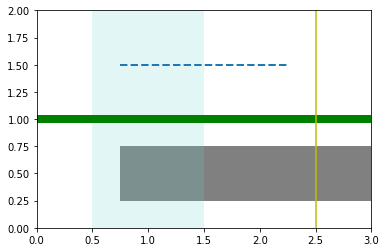

In [4]:
plt.close("all")
f, ax = plt.subplots()
ax.axis([0, 3, 0, 2])
ax.axhline(1, lw=8, color='g')
ax.axhline(y=1.5, ls="--", lw=2, xmin=0.25, xmax=0.75)
ax.axvline(2.5, color="y")
ax.axhspan(0.25, 0.75, xmin=0.25, facecolor='0.5')
ax.axvspan(0.5, 1.5, facecolor="#74D2D5", alpha=0.2)
plt.show()

### 散点图：Axes.scatter

参数：点大小向量s，点颜色向量c，透明度alpha。

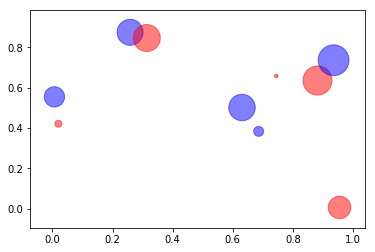

In [5]:
np.random.seed(230)
x, y = np.random.rand(2, 10)
np.random.seed(666)
point_size = 1000 * rand(10)

plt.close("all")
f, ax = plt.subplots()
ax.scatter(x, y, s=point_size, c=["b", "r"] * 5, alpha=0.5)
plt.show()

### 条形图：Axes.bar / barh

条形图命令 bar 用于绘制竖立的条形图，而 barh 用于绘制水平的。

在 `Axes.bar(left, height, width=0.8, bottom=None, **kwargs)` 命令中，条形的绘制区域是 `[left +/- width], [bottom, bottom + height]`。利用 yerr 与 error\_kw 参数，可以绘制 error 线在条形图中。 

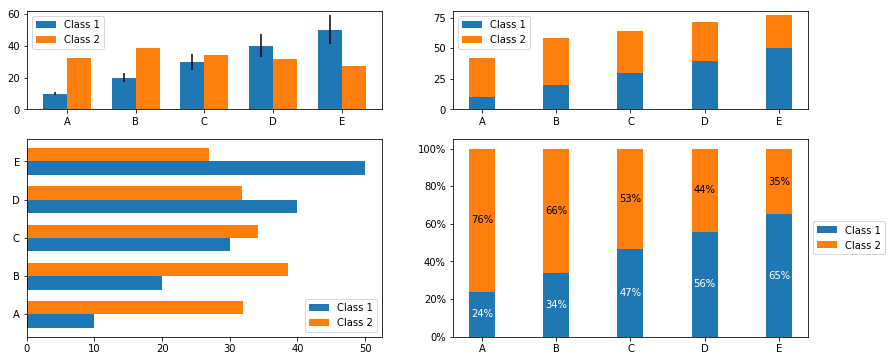

In [6]:
bar_width = 0.35
groups = np.arange(5)
y1 = np.linspace(10, 50, 5)
np.random.seed(0)
y2 = np.random.rand(5) * 40 + 10 

plt.close("all")
f, ax = plt.subplots(2, 2, figsize=(14, 6), gridspec_kw = {'height_ratios':[1, 2]})
# 并列竖立条形图
ax[0,0].bar(groups, y1, bar_width, label="Class 1",
          yerr=2 * groups + 1)
ax[0,0].bar(groups + bar_width, y2, bar_width, label="Class 2")
ax[0,0].set_xticks(groups + bar_width / 2)
ax[0,0].set_xticklabels(list("ABCDE"))
ax[0,0].legend(loc="upper left")

# 堆叠竖立条形图
ax[0,1].bar(groups, y1, bar_width, label="Class 1")
ax[0,1].bar(groups, y2, bar_width, bottom=y1, label="Class 2")
ax[0,1].set_xticks(groups)
ax[0,1].set_xticklabels(list("ABCDE"))
ax[0,1].legend(loc="upper left")

# 横置条形图
ax[1,0].barh(groups, y1, bar_width, label="Class 1")
ax[1,0].barh(groups + bar_width, y2, bar_width, label="Class 2")
ax[1,0].set_yticks(groups + bar_width / 2)
ax[1,0].set_yticklabels(list("ABCDE"))
ax[1,0].legend(loc="lower right")

# 堆叠竖立百分比条形图（附百分比数字）
y1_percent = y1 / (y1 + y2)
y2_percent = y2 / (y1 + y2)
ax[1,1].bar(groups, y1_percent, bar_width, label="Class 1")
ax[1,1].bar(groups, y2_percent, bar_width, bottom=y1_percent, label="Class 2")
## 加上百分比字串
for k in range(len(groups)):
    ax[1,1].text(groups[k], y1_percent[k]/2, r"{:.0%}".format(y1_percent[k]),
                 color="w", ha="center", va="center")
    ax[1,1].text(groups[k], y2_percent[k]/2 + y1_percent[k], 
                 r"{:.0%}".format(y2_percent[k]), color="k", ha="center", va="center")
ax[1,1].set_xticks(groups)
ax[1,1].set_xticklabels(list("ABCDE"))
ax[1,1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
## 设置 y 轴刻度
ax[1,1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
                                  lambda y, pos: r"{:.0f}%".format(100*y)))

plt.show()

### 填充：Axes.fill_between / fill_betweenx

参数：填充指定区域where，使用插值的精确点而不是原有的数据点interpolate=True。

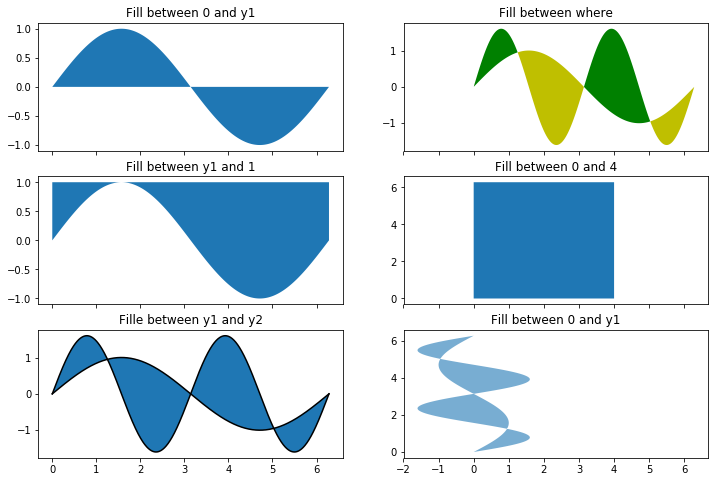

In [7]:
x = np.linspace(0, 2 * np.pi, 1000)

plt.close("all")
f, ax = plt.subplots(3, 2, sharex="col", figsize=(12, 8))
y1 = np.sin(x)
y2 = 1.6 * np.sin(2 * x)

ax[0,0].fill_between(x, 0, y1)
ax[0,0].set_title("Fill between 0 and y1")

ax[1,0].fill_between(x, y1, 1)
ax[1,0].set_title("Fill between y1 and 1")

ax[2,0].plot(x, y1, x, y2, color="k")
ax[2,0].fill_between(x, y1, y2)
ax[2,0].set_title("Fille between y1 and y2")

ax[0,1].fill_between(x, y1, y2, where = y2>y1, facecolor="g")
ax[0,1].fill_between(x, y1, y2, where = y2<y1, facecolor="y")
ax[0,1].set_title("Fill between where")

ax[1,1].fill_betweenx(x, 0, 4)
ax[1,1].set_title("Fill between 0 and 4")

ax[2,1].fill_betweenx(x, y1, y2, alpha=0.6)
ax[2,1].set_title("Fill between 0 and y1")

plt.show()

### 对数坐标轴：Axes.loglog / semilogx / semilogy

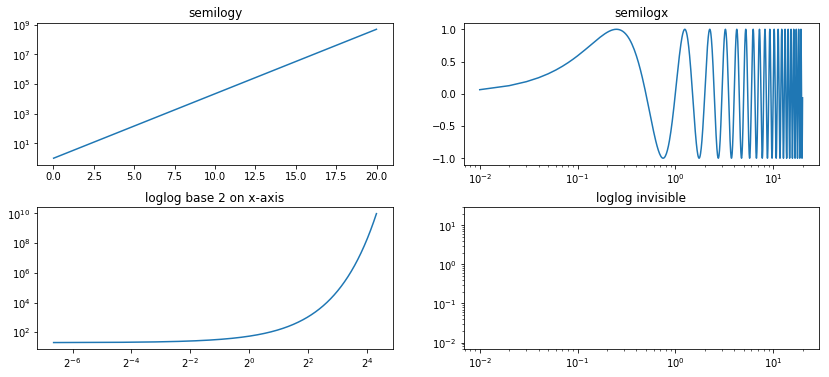

In [8]:
x = np.arange(0.01, 20, 0.01)

plt.close("all")
f, ax = plt.subplots(2, 2, figsize=(14, 6))
f.subplots_adjust(hspace=0.3)

ax[0,0].semilogy(x, np.exp(x))
ax[0,0].set_title("semilogy")

ax[0,1].semilogx(x, np.sin(2 * np.pi * x))
ax[0,1].set_title("semilogx")

ax[1,0].loglog(x, 20*np.exp(x), basex=2)
ax[1,0].set_title("loglog base 2 on x-axis")

ax[1,1].loglog(x, x, visible=False)
ax[1,1].set_title("loglog invisible")

plt.show()

## 附：GIF 动态图保存

这是一个非常有趣的功能。GIF 动态图的绘制与生成不同于静态图像。主要使用 matplotlib 中的 animation 模块。

### 前提工作

在开始绘制动态图之前，你可能需要一些工作来保证命令正常运行：

1. 下载并安装 [ImageMagick](https://www.imagemagick.org/script/download.php)，比如 Windows 用户选择“ImageMagick-x.x.x-0-Q16-x64-dll.exe”版本。其中 Q16 表示颜色的位深度，x.x.x是版本号。**请记录你将它安装到了何处。**安装成功后，在命令行下输入“convert”应当会正常调用ImageMagick。
2. 如果在安装后仍不能生成 GIF，那可能需要编辑你的 matplotlib 配置文件。你可以这样查找你的配置文件路径：

In [9]:
import matplotlib as mpl
mpl.matplotlib_fname()

'e:\\python\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

然后用文本编辑器打开 matplotlibrc，找到被“\#”注释的以下两行：

    #animation.ffmpeg_path: 'ffmpeg'
    #animation.convert_path: 'convert'

替换为（路径改成你的 ImageMagick 安装路径）：

    animation.ffmpeg_path: F:\ProgramFiles\ImageMagick-7.0.5-Q16\ffmpeg.exe
    animation.convert_path: F:\ProgramFiles\ImageMagick-7.0.5-Q16\convert.exe

### 例子

至于如何生成 GIF，例子如下。一些要点：

- 通常需要定义一个 update 函数。
- 通过 `FuncAnimation` 函数的 interval 参数，控制每帧停留的时间。
- 你可以使用 `set_data`（需要传入一个两行 n 列的 np.array 对象，或者两个类 List 对象） 代替 `set_ydata / set_xdata`。

In [10]:
from matplotlib.animation import FuncAnimation

x = np.linspace(0, 1, 100)
y = np.arange(0.05, 5, 0.05)

fig, ax = plt.subplots(figsize=(8,6))
# 注意这里把 plot 的结果保存到一个 Lines 对象
# 这个初始帧不会写入到 GIF
frames, = ax.plot(x, x)  

def update_gif(k, X=x):
    frames.set_ydata(np.power(X, k))
    ax.set_title("Curve of $y=x^k$ when k={:.2f}".format(k))
    ax.axis([0, 1, 0, 1])
    return frames, 

anim = FuncAnimation(fig, update_gif, y, interval=0.1*1000)  # 依次传入y并更新帧
gif_path = os.path.join(os.getcwd(), "{0}_files".format("Py3-matplotlib"))
if not os.path.exists(gif_path):
    os.makedirs(gif_path)
                        
anim.save(os.path.join(gif_path, "{0}_01.gif".format("Py3-matplotlib")), dpi=100, writer='imagemagick')

由于不能直接 plt.show（否则会把每一帧输出为单独的图片），这里我用 Markdown 的语法来嵌入这个 GIF:

![png](https://wklchris.github.io/assets/ipynb-images/Py3-matplotlib_01.gif)

如果你觉得 matplotlib + ImageMagick 的操作仍不能满足一些复杂的 GIF 要求，我推荐使用第三方的、带有图形界面的 GIF 制作软件，例如 Ulead Gif Animator. 